# Finance Data Visualization Project 

This notebook contains an exploratory data analysis of stock prices of some major banks in the US and Italy during the 2008 financial crisis. 

This project is just meant as a practice for data analysis and visualization in pandas and other libraries, it is not meant to be a robust financial analysis or be taken as financial advice. It is based on the Udemy course [Python Data Science and Machine Learning Bootcamp](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/) Finance Capstone project.

In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data

Pandas datareader allows us to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html).

We will get stock information for the following banks:

- US:

    * Bank of America
    * Goldman Sachs
    * Morgan Stanley

- Italy:
    * Intesa Sanpaolo 
    * UniCredit

In [2]:
start = datetime.date(2007,8,1)
end = datetime.date(2017,8,1)

In [3]:
# grab data for US banks
BAC = pdr.get_data_tiingo('BAC', start, end, api_key='c65b0d20d948f527290b2082c8d3fe60cc9696ed')
GS = pdr.get_data_tiingo('GS', start, end, api_key='c65b0d20d948f527290b2082c8d3fe60cc9696ed')
MS = pdr.get_data_tiingo('MS', start, end, api_key='c65b0d20d948f527290b2082c8d3fe60cc9696ed')

In [4]:
# grab data for Italian banks
ISNPY = pdr.get_data_tiingo('ISNPY', start, end, api_key='c65b0d20d948f527290b2082c8d3fe60cc9696ed')
UNCFF = pdr.get_data_tiingo('UNCFF', start, end, api_key='c65b0d20d948f527290b2082c8d3fe60cc9696ed')

In [5]:
# list ticker symbols
tickers = ['BAC','GS','MS','ISNPY','UNCFF']

In [6]:
BAC.head()

adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
BAC    2007-08-01 00:00:00+00:00  36.469716  36.645824  35.903107  36.217039   
       2007-08-02 00:00:00+00:00  36.584569  36.791305  36.416118  36.576912   
       2007-08-03 00:00:00+00:00  35.987333  36.829589  35.964362  36.485030   
       2007-08-06 00:00:00+00:00  36.875531  36.967413  35.619802  36.209382   
       2007-08-07 00:00:00+00:00  37.266031  37.779042  36.446745  36.783648   

                                  adjVolume  close  divCash   high    low  \
symbol date                                                                 
BAC    2007-08-01 00:00:00+00:00   48411400  47.63      0.0  47.86  46.89   
       2007-08-02 00:00:00+00:00   37180800  47.78      0.0  48.05  47.56   
       2007-08-03 00:00:00+00:00   43493200  47.00      0.0  48.10  46.97   
       2007-08-06 00:00:00+00:00   52233600  48.16      0.0  48.28  46.52   
       2007-08-07 00:00:00+00:00   46093100  48.67      0.0  49.34  47.60   

                                   open  splitFactor    volume  
symbol date                                                     
BAC    2007-08-01 00:00:00+00:00  47.30          1.0  48411400  
       2007-08-02 00:00:00+00:00  47.77          1.0  37180800  
       2007-08-03 00:00:00+00:00  47.65          1.0  43493200  
       2007-08-06 00:00:00+00:00  47.29          1.0  52233600  
       2007-08-07 00:00:00+00:00  48.04          1.0  46093100

In [7]:
# drop the 'symbol' column and concatenate
bank_stocks = pd.concat([BAC.xs(('BAC')),GS.xs(('GS')),MS.xs(('MS')),ISNPY.xs(('ISNPY')),UNCFF.xs(('UNCFF'))],axis=1,keys=tickers)
bank_stocks.head()

BAC                                   \
                            adjClose    adjHigh     adjLow    adjOpen   
date                                                                    
2007-08-01 00:00:00+00:00  36.469716  36.645824  35.903107  36.217039   
2007-08-02 00:00:00+00:00  36.584569  36.791305  36.416118  36.576912   
2007-08-03 00:00:00+00:00  35.987333  36.829589  35.964362  36.485030   
2007-08-06 00:00:00+00:00  36.875531  36.967413  35.619802  36.209382   
2007-08-07 00:00:00+00:00  37.266031  37.779042  36.446745  36.783648   

                                                                         ...  \
                          adjVolume  close divCash   high    low   open  ...   
date                                                                     ...   
2007-08-01 00:00:00+00:00  48411400  47.63     0.0  47.86  46.89  47.30  ...   
2007-08-02 00:00:00+00:00  37180800  47.78     0.0  48.05  47.56  47.77  ...   
2007-08-03 00:00:00+00:00  43493200  47.00     0.0  48.10  46.97  47.65  ...   
2007-08-06 00:00:00+00:00  52233600  48.16     0.0  48.28  46.52  47.29  ...   
2007-08-07 00:00:00+00:00  46093100  48.67     0.0  49.34  47.60  48.04  ...   

                              UNCFF                                          \
                             adjLow   adjOpen adjVolume close divCash  high   
date                                                                          
2007-08-01 00:00:00+00:00  7.088130  7.088130    7390.0  8.35     0.0  8.50   
2007-08-02 00:00:00+00:00  7.300349  7.300349   13992.0  8.60     0.0  8.60   
2007-08-03 00:00:00+00:00  7.130573  7.130573    7503.0  8.40     0.0  8.65   
2007-08-06 00:00:00+00:00  7.130573  7.130573       0.0  8.40     0.0  8.65   
2007-08-07 00:00:00+00:00  7.300349  7.300349    9137.0  8.60     0.0  8.75   

                                                            
                            low  open splitFactor   volume  
date                                                        
2007-08-01 00:00:00+00:00  8.35  8.35         1.0   7390.0  
2007-08-02 00:00:00+00:00  8.60  8.60         1.0  13992.0  
2007-08-03 00:00:00+00:00  8.40  8.40         1.0   7503.0  
2007-08-06 00:00:00+00:00  8.40  8.40         1.0      0.0  
2007-08-07 00:00:00+00:00  8.60  8.60         1.0   9137.0  

[5 rows x 60 columns]

In [8]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [9]:
bank_stocks.head()

Bank Ticker                      BAC                                   \
Stock Info                  adjClose    adjHigh     adjLow    adjOpen   
date                                                                    
2007-08-01 00:00:00+00:00  36.469716  36.645824  35.903107  36.217039   
2007-08-02 00:00:00+00:00  36.584569  36.791305  36.416118  36.576912   
2007-08-03 00:00:00+00:00  35.987333  36.829589  35.964362  36.485030   
2007-08-06 00:00:00+00:00  36.875531  36.967413  35.619802  36.209382   
2007-08-07 00:00:00+00:00  37.266031  37.779042  36.446745  36.783648   

Bank Ticker                                                              ...  \
Stock Info                adjVolume  close divCash   high    low   open  ...   
date                                                                     ...   
2007-08-01 00:00:00+00:00  48411400  47.63     0.0  47.86  46.89  47.30  ...   
2007-08-02 00:00:00+00:00  37180800  47.78     0.0  48.05  47.56  47.77  ...   
2007-08-03 00:00:00+00:00  43493200  47.00     0.0  48.10  46.97  47.65  ...   
2007-08-06 00:00:00+00:00  52233600  48.16     0.0  48.28  46.52  47.29  ...   
2007-08-07 00:00:00+00:00  46093100  48.67     0.0  49.34  47.60  48.04  ...   

Bank Ticker                   UNCFF                                          \
Stock Info                   adjLow   adjOpen adjVolume close divCash  high   
date                                                                          
2007-08-01 00:00:00+00:00  7.088130  7.088130    7390.0  8.35     0.0  8.50   
2007-08-02 00:00:00+00:00  7.300349  7.300349   13992.0  8.60     0.0  8.60   
2007-08-03 00:00:00+00:00  7.130573  7.130573    7503.0  8.40     0.0  8.65   
2007-08-06 00:00:00+00:00  7.130573  7.130573       0.0  8.40     0.0  8.65   
2007-08-07 00:00:00+00:00  7.300349  7.300349    9137.0  8.60     0.0  8.75   

Bank Ticker                                                 
Stock Info                  low  open splitFactor   volume  
date                                                        
2007-08-01 00:00:00+00:00  8.35  8.35         1.0   7390.0  
2007-08-02 00:00:00+00:00  8.60  8.60         1.0  13992.0  
2007-08-03 00:00:00+00:00  8.40  8.40         1.0   7503.0  
2007-08-06 00:00:00+00:00  8.40  8.40         1.0      0.0  
2007-08-07 00:00:00+00:00  8.60  8.60         1.0   9137.0  

[5 rows x 60 columns]

# EDA

#### Maximum close price for each bank's stock in the whole time period considered

In [10]:
bank_stocks.xs(key='close', axis=1, level='Stock Info').max()

Bank Ticker
BAC       52.71
GS       252.89
MS        69.09
ISNPY     48.70
UNCFF     31.36
dtype: float64

**Create a new dataframe that will contain the returns for each bank's stock, defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [11]:
returns = pd.DataFrame()

In [12]:
tickers

['BAC', 'GS', 'MS', 'ISNPY', 'UNCFF']

In [13]:
for tick in tickers:
    returns[tick+'_return'] = bank_stocks.xs(key='close', axis=1, level='Stock Info')[tick].pct_change()

In [14]:
returns.head()

,BAC_return,GS_return,MS_return,ISNPY_return,UNCFF_return
date,,,,,
2007-08-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2007-08-02 00:00:00+00:00,0.003149,-0.008148,-0.007766,0.003297,0.029940
2007-08-03 00:00:00+00:00,-0.016325,-0.041502,-0.051033,-0.009858,-0.023256
2007-08-06 00:00:00+00:00,0.024681,0.045136,0.056252,0.014381,0.000000
2007-08-07 00:00:00+00:00,0.010590,0.018425,0.004685,0.019629,0.023810


**Pairplot of the returns dataframe.**

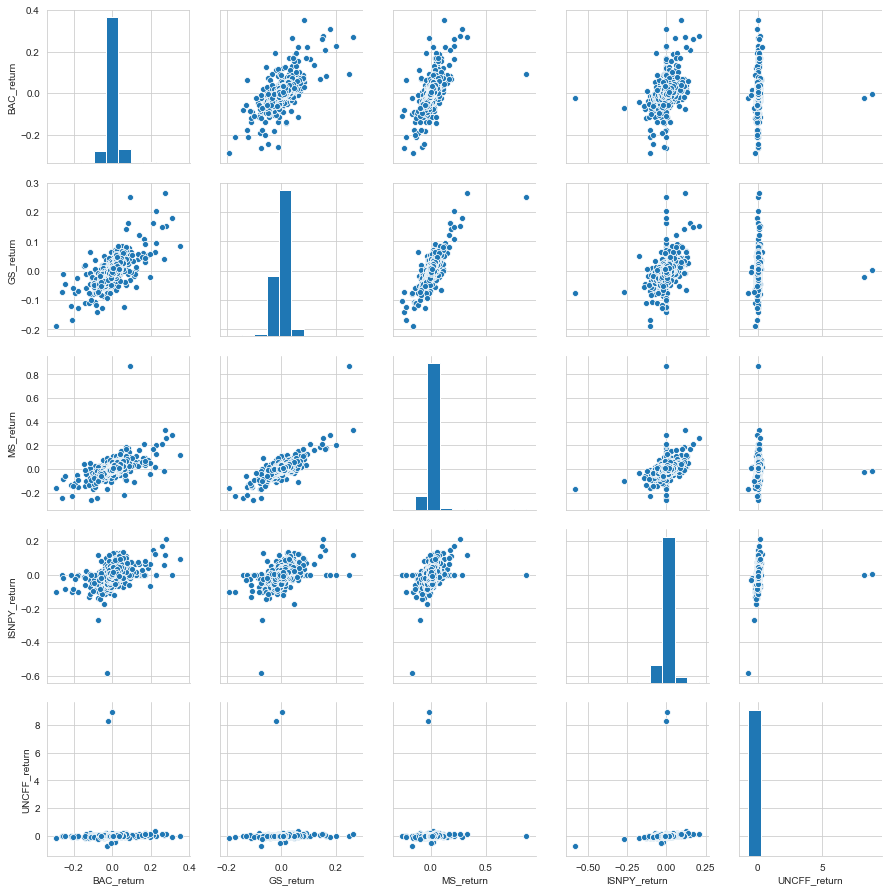

In [15]:
sns.set_style('whitegrid')
sns.pairplot(returns[1:])

**Dates on which each bank stock had the best and worst single day returns.**

In [16]:
returns.idxmin()

BAC_return     2009-01-20 00:00:00+00:00
GS_return      2009-01-20 00:00:00+00:00
MS_return      2008-10-09 00:00:00+00:00
ISNPY_return   2008-10-27 00:00:00+00:00
UNCFF_return   2008-10-27 00:00:00+00:00
dtype: datetime64[ns, UTC]

In [17]:
returns.idxmax()

BAC_return     2009-04-09 00:00:00+00:00
GS_return      2008-11-24 00:00:00+00:00
MS_return      2008-10-13 00:00:00+00:00
ISNPY_return   2009-03-10 00:00:00+00:00
UNCFF_return   2017-01-23 00:00:00+00:00
dtype: datetime64[ns, UTC]

**Look at the standard deviation of the returns, to see which stocks are the riskiest.**

In [18]:
returns.std()

BAC_return      0.037173
GS_return       0.025371
MS_return       0.038025
ISNPY_return    0.031170
UNCFF_return    0.245944
dtype: float64

In [19]:
# Look at 2016 data
returns[(returns.index.year<2017)&(returns.index.year>2015)].std()

BAC_return      0.020229
GS_return       0.016883
MS_return       0.020528
ISNPY_return    0.033561
UNCFF_return    0.043051
dtype: float64

**Distribution plot of the returns for Goldman Sachs**

C:\Users\franc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


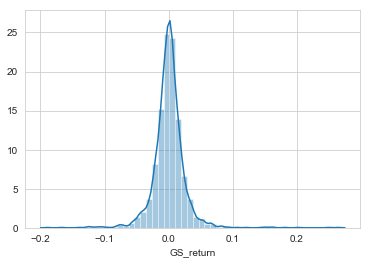

In [20]:
sns.distplot(returns[1:]['GS_return'])

**Distribution plot of the 2008 returns for Goldman Sachs**

C:\Users\franc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


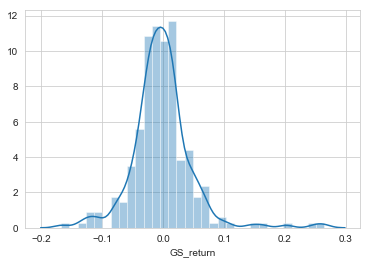

In [21]:
sns.distplot(returns[(returns.index.year<2009)&(returns.index.year>2007)]['GS_return'])

# Close price visualization


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Plotly
import plotly
import cufflinks as cf
cf.go_offline()

**Line plot showing close price for each bank for the entire index of time**

C:\Users\franc\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: FutureWarning:

Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.

C:\Users\franc\Anaconda3\lib\site-packages\seaborn\relational.py:792: FutureWarning:

Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.

C:\Users\franc\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matp

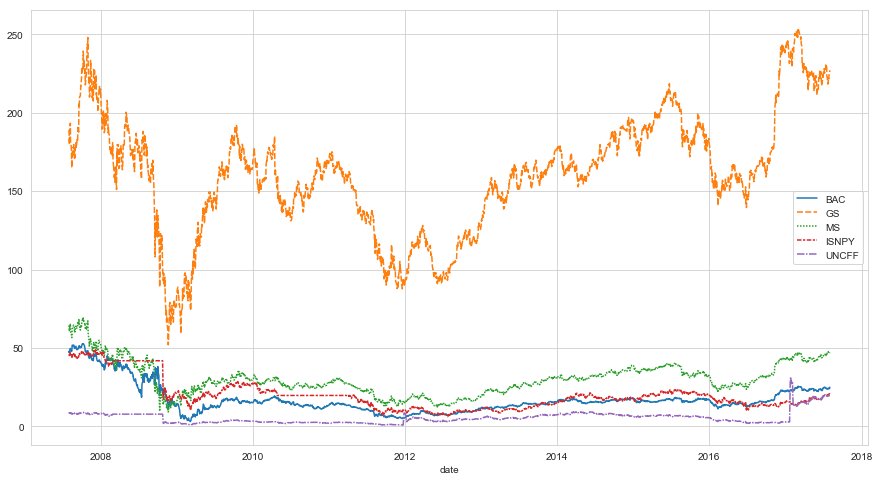

In [23]:
plt.figure(figsize=(15,8))
sns.lineplot(data=bank_stocks.xs(key='close', axis=1, level='Stock Info'))

C:\Users\franc\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: FutureWarning:

Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.

C:\Users\franc\Anaconda3\lib\site-packages\seaborn\relational.py:792: FutureWarning:

Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.



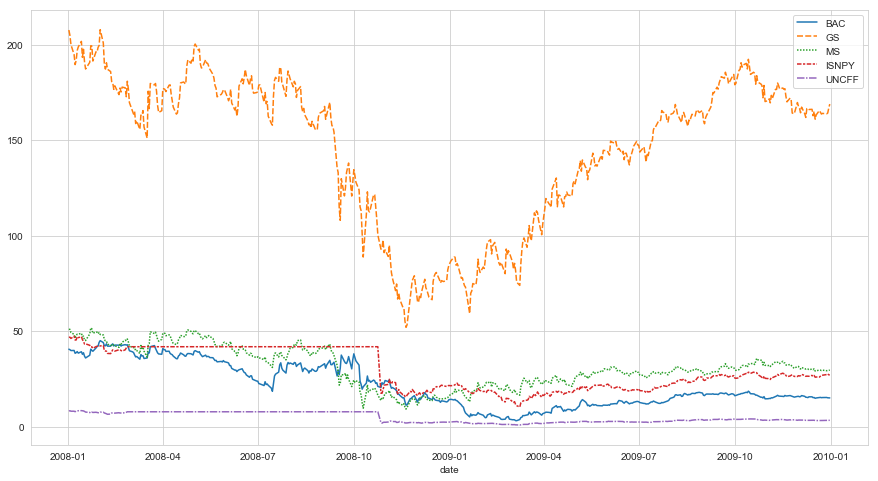

In [24]:
# Zoom in to look at 2008
plt.figure(figsize=(15,8))
df_close = bank_stocks.xs(key='close', axis=1, level='Stock Info')
df_close_crisis = df_close[(df_close.index.year<2010)&(df_close.index.year>2007)]
sns.lineplot(data=df_close_crisis)

## Moving Averages

**Plot of rolling 30 day average against the close price for Bank Of America's stock for the year 2008**

<Figure size 1080x576 with 0 Axes>

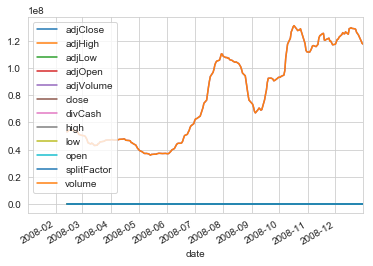

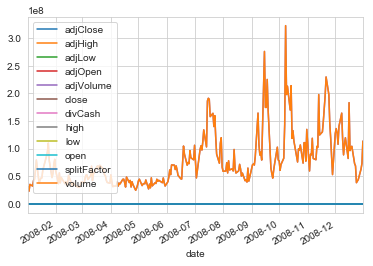

In [25]:
plt.figure(figsize=(15,8))
df_BAC = BAC.xs('BAC')
df_BAC_08 = df_BAC[(df_BAC.index.year<2009)&(df_BAC.index.year>2007)]
df_BAC_08.rolling(window=30).mean().plot(label='30 Day Avg')
df_BAC_08.plot(label='BAC CLOSE')
plt.legend()

**Plot rolling 30 day average for Intesa Sanpaolo**

<Figure size 1080x576 with 0 Axes>

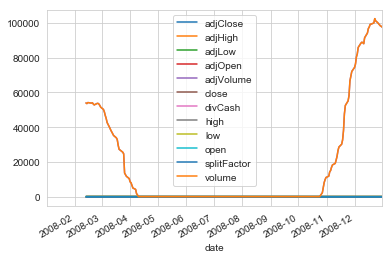

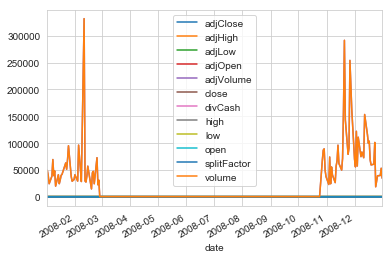

In [26]:
plt.figure(figsize=(15,8))
df_ISNPY = ISNPY.xs('ISNPY')
df_ISNPY_08 = df_ISNPY[(df_ISNPY.index.year<2009)&(df_ISNPY.index.year>2007)]
df_ISNPY_08.rolling(window=30).mean().plot(label='30 Day Avg')
df_ISNPY_08.plot(label='ISNPY CLOSE')
plt.legend()

**Correlation between the stocks close price.**

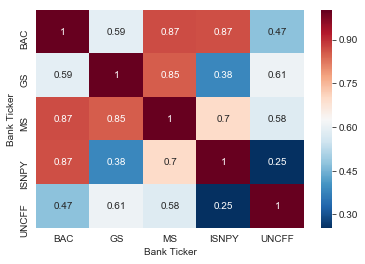

In [27]:
sns.heatmap(bank_stocks.xs(key='close', axis=1, level='Stock Info').corr(), cmap='RdBu_r', annot=True)

**Cluster the correlations together**

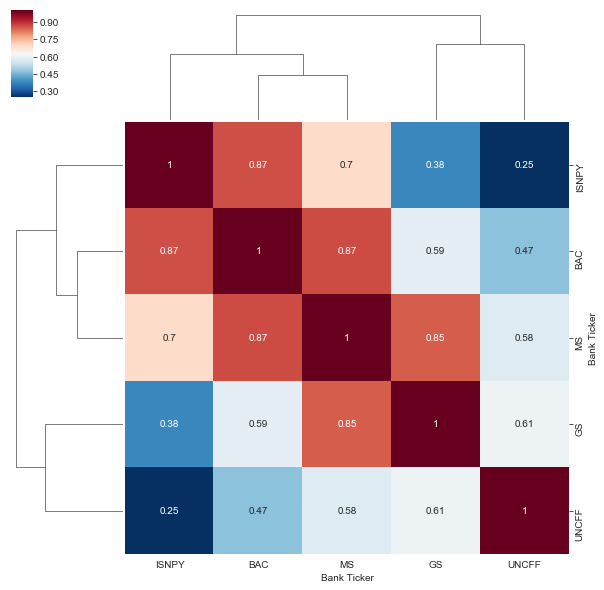

In [28]:
sns.clustermap(bank_stocks.xs(key='close', axis=1, level='Stock Info').corr(), cmap='RdBu_r',annot=True)

# Interactive visualizations

**Candle plot of Bank of America's stock.**

In [29]:
import plotly.graph_objects as go
df_BAC_ohlc = BAC.xs('BAC')[['open', 'high', 'low', 'close']].reset_index()

fig = go.Figure(data=[go.Candlestick(x=df_BAC_ohlc['date'],
                open=df_BAC_ohlc['open'],
                high=df_BAC_ohlc['high'],
                low=df_BAC_ohlc['low'],
                close=df_BAC_ohlc['close'])])

fig.show()

**Simple Moving Averages plot of Intesa Sanpaolo's stocks.**

In [30]:
df_ISNPY = ISNPY.xs('ISNPY')[['close']]
df_ISNPY.ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Bollinger Band Plot for Morgan Stanley.**

In [31]:
df_MS = MS.xs('MS')[['close']]
df_MS.ta_plot(study='boll')

Although this is an exercise to understand different data visualization libraries, we can definitely see the drop in stock prices in 2008 for all banks.